In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
mi = np.genfromtxt('data/MI_timesteps.txt',skip_header=1)
mi, mi.shape

(array([[1.0000e+00, 3.6000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 3.6000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.0000e+00, 4.3000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.4999e+04, 0.0000e+00, 1.0000e+01, ..., 2.0000e+00, 1.0000e+00,
         4.0000e+01],
        [1.5000e+04, 0.0000e+00, 1.0000e+01, ..., 3.0000e+00, 1.0000e+00,
         4.1000e+01],
        [1.5001e+04, 0.0000e+00, 1.1000e+01, ..., 1.0000e+00, 0.0000e+00,
         4.2000e+01]]),
 (15001, 10))

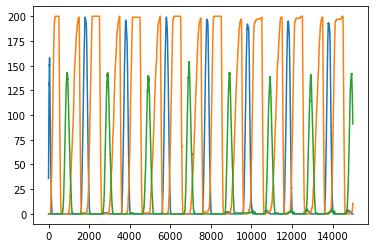

In [5]:
plt.plot(mi[:,0],mi[:,1])
plt.plot(mi[:,0],mi[:,2])
plt.plot(mi[:,0],mi[:,3])

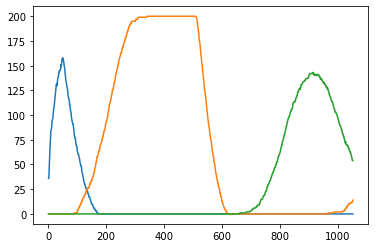

In [6]:
plt.plot(mi[:3*351,0],mi[:3*351,1])
plt.plot(mi[:3*351,0],mi[:3*351,2])
plt.plot(mi[:3*351,0],mi[:3*351,3])

In [7]:
delayed_row = mi[:351, 1:4]
print(delayed_row)
print(delayed_row.flatten())

[[ 36.   0.   0.]
 [ 36.   0.   0.]
 [ 43.   0.   0.]
 ...
 [  0. 200.   0.]
 [  0. 200.   0.]
 [  0. 200.   0.]]
[ 36.   0.   0. ...   0. 200.   0.]


In [8]:
len(mi)

15001

In [11]:
window = 351
delayed_list = []
for i in range(len(mi)-window+1):
    delayed_list.append(mi[i:i+window, 1:4].flatten())
delayed = np.vstack(delayed_list)
delayed, delayed.shape

(array([[ 36.,   0.,   0., ...,   0., 200.,   0.],
        [ 36.,   0.,   0., ...,   0., 200.,   0.],
        [ 43.,   0.,   0., ...,   0., 200.,   0.],
        ...,
        [  2.,   0.,   0., ...,   0.,  10.,  93.],
        [  2.,   0.,   0., ...,   0.,  10.,  93.],
        [  2.,   0.,   0., ...,   0.,  11.,  91.]]),
 (14651, 1053))

In [32]:
pca = PCA(n_components=2, random_state=42)
pca.fit(delayed)

PCA(n_components=2, random_state=42)

In [33]:
pca.explained_variance_ratio_

array([0.45662297, 0.23008273])

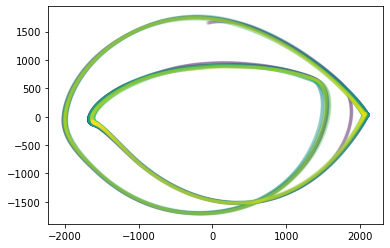

In [40]:
transformed = pca.transform(delayed)
plt.scatter(transformed[:,0], transformed[:,1], marker='.', alpha=0.1, c=range(len(transformed)))

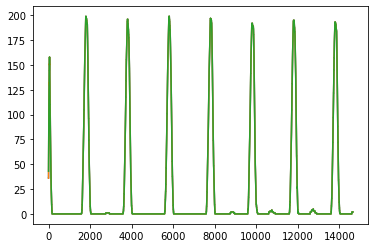

In [36]:
plt.plot(delayed[:,0])
plt.plot(delayed[:,3])
plt.plot(delayed[:,6])

In [38]:
np.diff(np.array([5,6,7,3]))

array([ 1,  1, -4])

In [44]:
transformed

array([[  -61.09149986,  1651.88989281],
       [  -48.25065955,  1655.65185233],
       [  -35.39420717,  1659.28865528],
       ...,
       [-1627.18219242,   -79.70258456],
       [-1627.83183178,   -78.19234806],
       [-1628.4228301 ,   -76.59196122]])

array([13.38056498, 13.36093947, 13.30574274, ...,  1.64706086,
        1.64403332,  1.70602376])

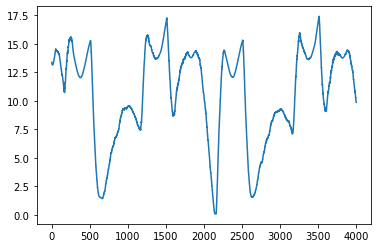

In [49]:
arclength = np.linalg.norm(np.diff(transformed, axis=0),axis=1)
plt.plot(arclength[:4000])

In [51]:
86400*14

1209600